#  Logistic Regression

In [21]:
#!pip install numpy
#!pip install matplotlib
#!pip install pandas

In [22]:
#Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [23]:
# Importing the dataset
df = pd.read_excel('exam.xlsx', sheet_name='Ads')

In [24]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [26]:
df = df.drop(['User ID'], axis='columns', inplace=False)

In [27]:
# Function Encoding
def encoding_char(x):
    char_var = list(set(x.columns) - set(x._get_numeric_data().columns))
    for col_names in char_var:
        f = pd.factorize(x[col_names])
        x[col_names] = pd.factorize(x[col_names])[0]
    return(x)

In [28]:
# Encoding categorical data
df = encoding_char(df)

In [29]:
df

,Gender,Age,EstimatedSalary,Purchased
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0
...,...,...,...,...
395,1,46,41000,1
396,0,51,23000,1
397,1,50,20000,1
398,0,36,33000,0


In [30]:
# Splitting the dataset into the Training set and Test set
X = df.iloc[:, :-1]
y = df['Purchased']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [31]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler().fit(X_train)
X_train = sc_X.transform(X_train)
X_test = sc_X.transform(X_test)

In [32]:
# Baseline model
import statsmodels.api as sm
lr = sm.Logit(y_train, X_train).fit()
print(lr.summary2())

Optimization terminated successfully.
         Current function value: 0.380897
         Iterations 7
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.424     
Dependent Variable: Purchased        AIC:              249.7740  
Date:               2022-01-04 12:32 BIC:              261.0789  
No. Observations:   320              Log-Likelihood:   -121.89   
Df Model:           2                LL-Null:          -211.70   
Df Residuals:       317              LLR p-value:      9.8765e-40
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
--------------------------------------------------------------------
        Coef.     Std.Err.       z       P>|z|      [0.025    0.975]
--------------------------------------------------------------------
x1     -0.1428      0.1597    -0.8944    0.3711    -0.4559    0.1702
x2      2.3168      0.2879     8.0460    0.0000     1.

In [33]:
# Automatic Feature Selection
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
estimator=LogisticRegression()
selector=RFECV(estimator, step=1)
selector=selector.fit(X_train, y_train)
print(selector.n_features_)
print(selector.support_)
print(selector.ranking_)

3
[ True  True  True]
[1 1 1]


In [34]:
# Leaving only Selected Features
X_train_select=X_train[:,[True,  True,  True]]
X_test_select=X_test[:,[True,  True,  True]]

In [35]:
# Fitting Logistic Regression to the Training set (2 variables)
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression().fit(X_train_select, y_train)

In [36]:
# Predicting the Test set results
y_pred = lr.predict(X_test_select)
lr.score(X_test_select,y_test).round(2)

0.82

In [37]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[49  8]
 [ 6 17]]


In [38]:
# 2 features
X_train = X_train[:,[1,2]]
X_test = X_test[:,[1,2]]

In [39]:
# Fitting Logistic Regression to the Training set (2 variables)
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 13).fit(X_train, y_train)

In [40]:
# Predicting the Test set results
y_pred = lr.predict(X_test)
lr.score(X_test,y_test).round(2)

0.84

In [41]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[50  7]
 [ 6 17]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


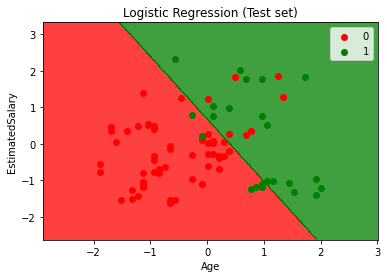

In [42]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, lr.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('EstimatedSalary')
plt.legend()
plt.show()

По итогу можем отметить, что при выборе двух переменных модель работает немного лучше. Коэф. детерм. повысился на 2% и на одно ложное распознавание меньше.